#### TEAM MEMBERS:
Dhruv Patel, Zahraa Abbasi, Tahmina Ahmad

# PROJECT GOAL

This dataset includes a large number of red wines and their respective specifications. The CSV file has over 1600 wines and their respective features. The specifications include the fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and quality (0-10). 
For this project, we intend to use k-means to see if there is a correlation between our clusters (using all the variables within the dataset except quality) and quality of the wines. Additionally, we will use PCA to see which variables are most closely related to the quality of the wine.


In [1]:
# import statements
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
plt.style.use('ggplot')

# removes a warning from seaborn and pandas
pd.options.mode.chained_assignment = None

### New Packages and Citations

#### Sklearn KMeans
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html <br>
The Sklearn KMeans allows us to perform KMeans very easily. All we require is number of clusters and our dataset. This allows us to extract labels for each datapoint and the sse for the clusters. This package rarely differentiates from our in class implementation, except for the fact that to initialize clusters, it uses a special "kmeans++" method where it initalizes intelligently to speed up convergence

#### Sklearn PCA
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA <br>
The Sklearn PCA allows us to perform PCA with ease. This skips all the steps regarding eigenvalues and we can utilize fit_transform() to perform dimensional reduction on our dataset to view it.

#### Seaborn
https://seaborn.pydata.org/generated/seaborn.scatterplot.html <br>
https://seaborn.pydata.org/generated/seaborn.heatmap.html <br>
Seaborn is essentially the same as matplotlib. One benefit that seaborn allows is that it can create a legend based on colors or labels in a graph. We found out that it is rather difficult to do this through matplotlib so we chose to repalce matplotlib with seaborn for this operation. Additionally, seaborn allows us to implement easier to read and create heatmaps, which we utilized for our correlation matrix

In [2]:
# import redWine data
dfRedWine = pd.read_csv("winequality-red.csv", sep = ';')
dfRedWineParams = dfRedWine.drop(columns=['quality'])
dfRedWine.describe()

# get a list of all features in base data
features = []
for col, value in dfRedWine.items():
    features.append(col)


#### Visualizing our features

The histograms below allow us to visualize the distribution of our features. As we can see, quality 5-6 are the most prominent in our dataset, so we expect the cluster average quality to be between those values due to the sheer amount of those data points.

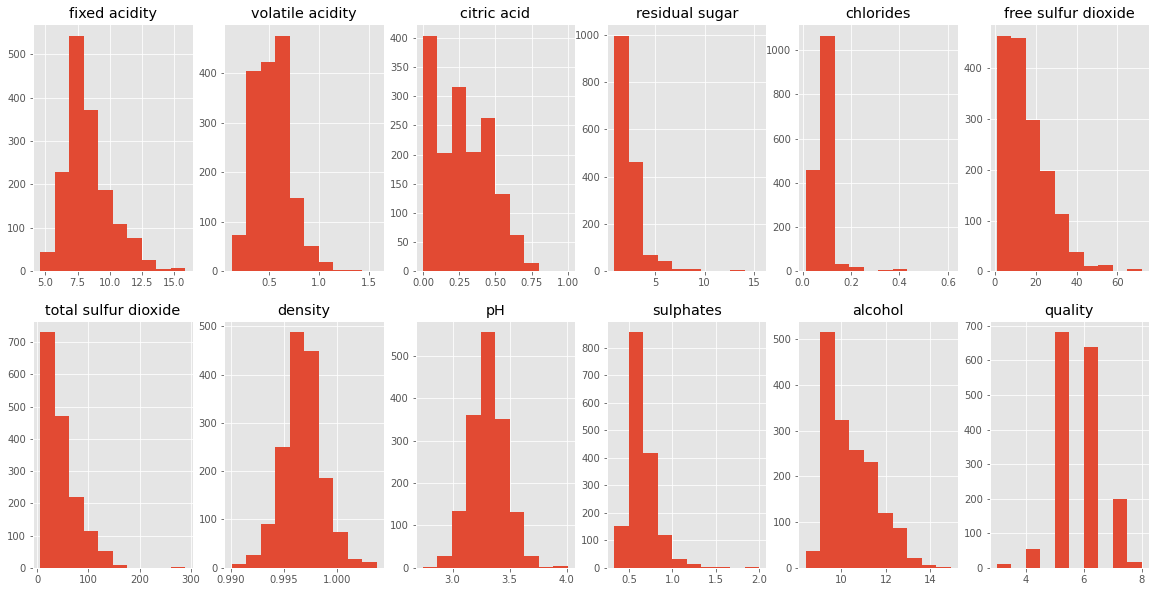

In [3]:
# visualize distribution of each feature
fig,ax = plt.subplots(ncols=6,nrows=2,figsize=(20,10))

featureId = 0
for row in range(2):
    for col in range(6):
        ax[row][col].hist(dfRedWine[features[featureId]])
        ax[row][col].set_title(features[featureId])
        featureId += 1

#### Examining Correlation between all features.

The main takeaway from the correlation matrix is which features correlate the best with quality. After a quick analysis, we can note that "volatile acidity", "citric acid", "sulphates", and "alcohol" correlate well with alcohol. In the future, we will perform k-means with only these values to see if the clusters are better representative of quality with these features.

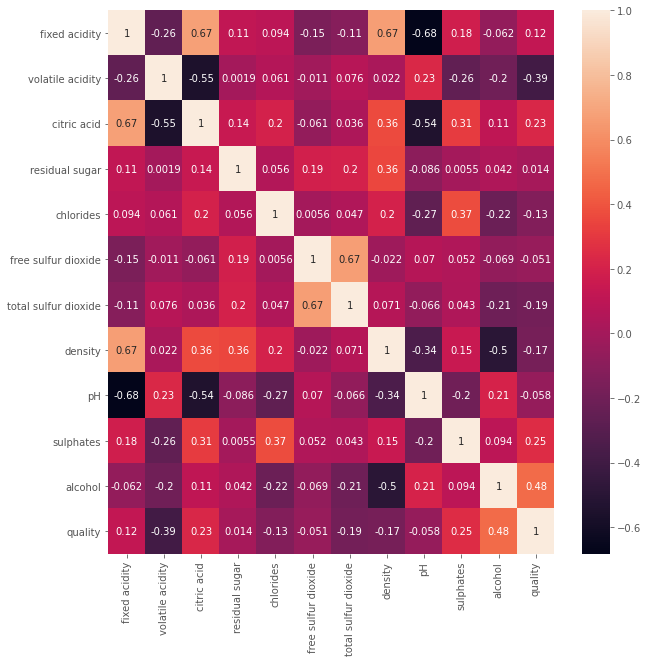

In [4]:

# print a correlation matrix using seaborn heatmap
corrMatrix = dfRedWine.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [5]:
# helper functions for KMeans and PCA

def getKMeans(numClusters, dataframe):
    """
    get labels for dataframe
    """
    
    # initializes skleaern KMeans and fits our dataframe to it
    basekMeans = KMeans(numClusters).fit(dataframe)
    
    # extracts the labels
    labels = basekMeans.labels_
    
    return labels

def getClusterAverageQuality(numClusters, labels):
    # initialize cluster average dictionary
    clusterQuality = {}
    for i in range(numClusters):
        clusterQuality[i] = []
    
    
    for index, value in enumerate(labels):
        quality = dfRedWine['quality'].iloc[index]
        clusterQuality[value].append(quality)
    
    clusterAvg = {}
    for cluster in clusterQuality:
        clusterAvg[cluster] = np.mean(clusterQuality[cluster])
        
    return clusterQuality, clusterAvg

def getPCA(dataframe, labels, numClusters):
    
    # initalizes PCA and fits data through it
    pcaVals = PCA(2).fit_transform(dataframe)
    
    # graphs our PCA data using seaborn. Labels colors by 'hue'
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    df = pd.DataFrame(pcaVals, columns = ['PCA 1', 'PCA 2'])
    df['Clusters'] = labels.tolist()
    
    sns.scatterplot(data = df, x = 'PCA 1', y = 'PCA 2', hue = 'Clusters', palette = 'colorblind').set_title("PCA Analysis")
    

#### Initialize K-Means

Below is our first test run of KMeans. We started clustering with numCluster = 6.
We chose 6 as it isolates the outliers shown later in the PCA diagram into their own clusters.

From our analysis, we can see that the clusters do a poor job of indicating the quality of the wines as all cluster averages are very similar.. We suspect that this may be because we are taking into account all of the variables. However, it is more probable that only some of the variables (if more than one), are indicative of the wine quality. <br>


In [6]:
# intialize kMeans with random cluster count: 6
numClusters = 6
labels= getKMeans(numClusters, dfRedWineParams)
clusterQuality, clusterAvg = getClusterAverageQuality(numClusters, labels)

for cluster in clusterAvg:
    print(f'Average for cluster {cluster} is: {clusterAvg[cluster]}')


Average for cluster 0 is: 5.700892857142857
Average for cluster 1 is: 5.764214046822742
Average for cluster 2 is: 5.425531914893617
Average for cluster 3 is: 5.068493150684931
Average for cluster 4 is: 7.0
Average for cluster 5 is: 5.541379310344827


#### Perform PCA
It is very difficult to visualize the 11 feature k-means, therefore we will be performing PCA on our dataset to reduce it to 2 dimensions.
With this, we are able to see the outliers very clearly, and that K-means did a wonderful job clustering our dataset.

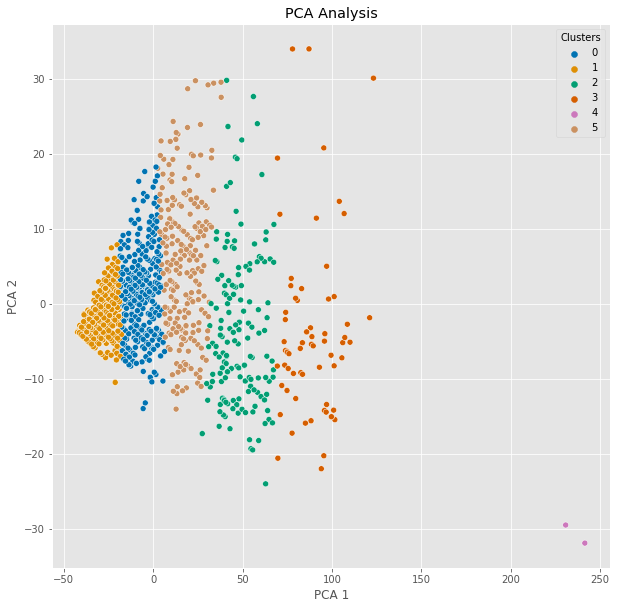

In [7]:
getPCA(dfRedWineParams, labels, numClusters)

In [8]:
"""
The following code only works if the outliers lie in the 6th cluster . 
The code is commented out because we are not guaranteed which cluster they will end up in.
The goal of the code is to find the index of these outliers and drop them. 
"""

# outliers = []
# for index, value in enumerate(labels):
#     if value == 5:
#         outliers.append(index)
# outliers

"""
The code stated the outliers are located in index 1079, and 1081
So we will drop them below
"""

dfRedWine = dfRedWine.drop(1079)
dfRedWine = dfRedWine.drop(1081)
dfRedWineParams = dfRedWine.drop(columns=['quality'])

#### Check if Outliers Dropped

The code below reruns PCA to see if the two outliers are dropped. As we can see both outliers are dropped.

Average for cluster 0 is: 5.068493150684931
Average for cluster 1 is: 5.700617283950617
Average for cluster 2 is: 5.403409090909091
Average for cluster 3 is: 5.755
Average for cluster 4 is: 5.543933054393306
Average for cluster 5 is: 5.722077922077922


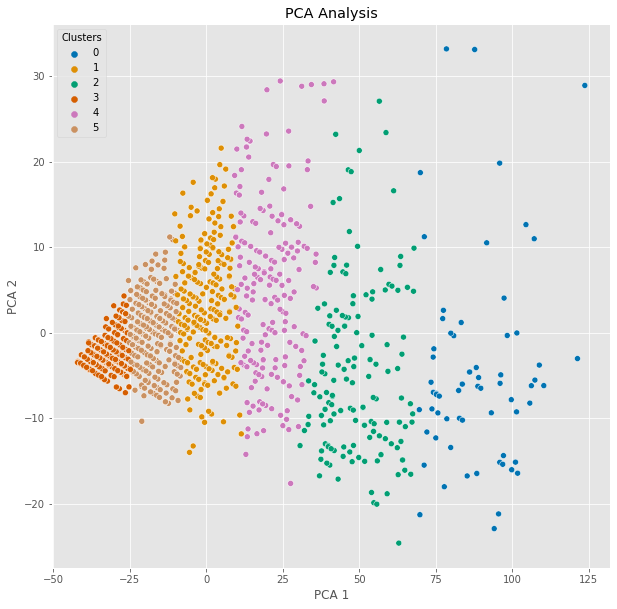

In [9]:
numClusters = 6
labels = getKMeans(numClusters, dfRedWineParams)
clusterQuality, clusterAvg = getClusterAverageQuality(numClusters, labels)
getPCA(dfRedWineParams, labels, numClusters)



for cluster in clusterAvg:
    print(f'Average for cluster {cluster} is: {clusterAvg[cluster]}')


#### Reducing our Feature Count

As we noticed prior, the K-Means clusters failed to represent quality distribution. Therefore, we limited the features that held the highest correlation with quality from our correlation matrix. We will now proceed to see if these features are better predictors of quality.

In [10]:
dfShort = dfRedWine[['volatile acidity', 'sulphates', 'alcohol', 'citric acid', 'quality']]
dfShortParams = dfShort.drop(columns=['quality'])

### Creating an Elbow Plot
Below we are creating an elbow plot for our new dataset. This is to see what numCluster is appropriate for this dataset. As we see, the elbow is located at numClusters = 3. Therefore we will be proceeding forward with this cluster size.

Text(0.5, 1.0, 'Elbow Plot')

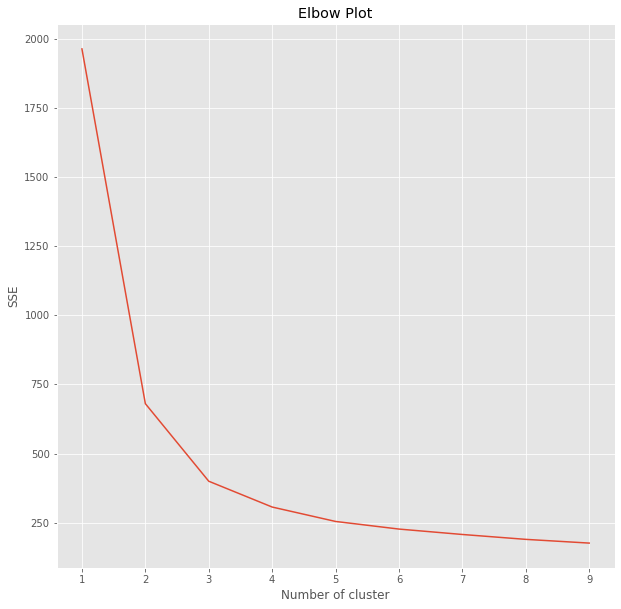

In [11]:
sse = {}
for k in range(1, 10):
    # performs kmeans on different cluster size 
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(dfShortParams)
    
    # gets the sse
    sse[k] = kmeans.inertia_ 
    
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot(list(sse.keys()), list(sse.values()))
ax.set_xlabel("Number of cluster")
ax.set_ylabel("SSE")
ax.set_title("Elbow Plot")

#### Running K-Means with lesser features

Now that we know that numClusters = 3 is the best for our new shortened dataframe, we will perform the same functions again. Below we see that a cluster has a much higher average quality value compared to other clusters. Therefore, K-means is somewhat representative of quality, as one cluster seems to have a unit higher average quality.

In [21]:
numClusters = 3
labels= getKMeans(numClusters, dfShortParams)
clusterQuality, clusterAvg = getClusterAverageQuality(numClusters, labels)


for cluster in clusterAvg:
    print(f'Average for cluster {cluster} is: {clusterAvg[cluster]}')

Average for cluster 0 is: 5.324228028503563
Average for cluster 1 is: 5.796934865900383
Average for cluster 2 is: 6.390557939914163


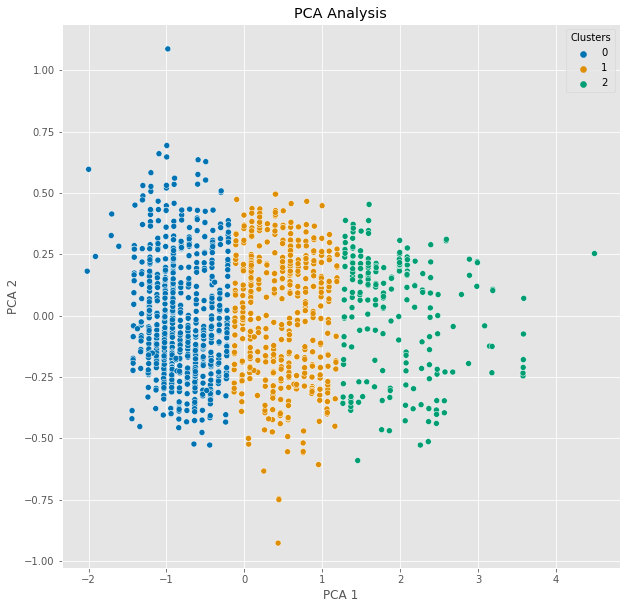

In [22]:
getPCA(dfShortParams, labels, numClusters)

#### Analyzing the features one by one:

When we analyze the features one by one, we notice that alcohol is the main decider of the clusters. It seems that the clusters have chosen alcohol to split on. Meanwhile, the other features are not distributed so neatly across the x-axis. In fact, they are distributed better along the y-axis which is 'quality'. This shows that the k-means distribution chose to spread the clusters by quality in the other three features rather than their respective x-axis. <br>

This is good for our analysis as it shows that the clusters have somewhat started to form around quality for some features.

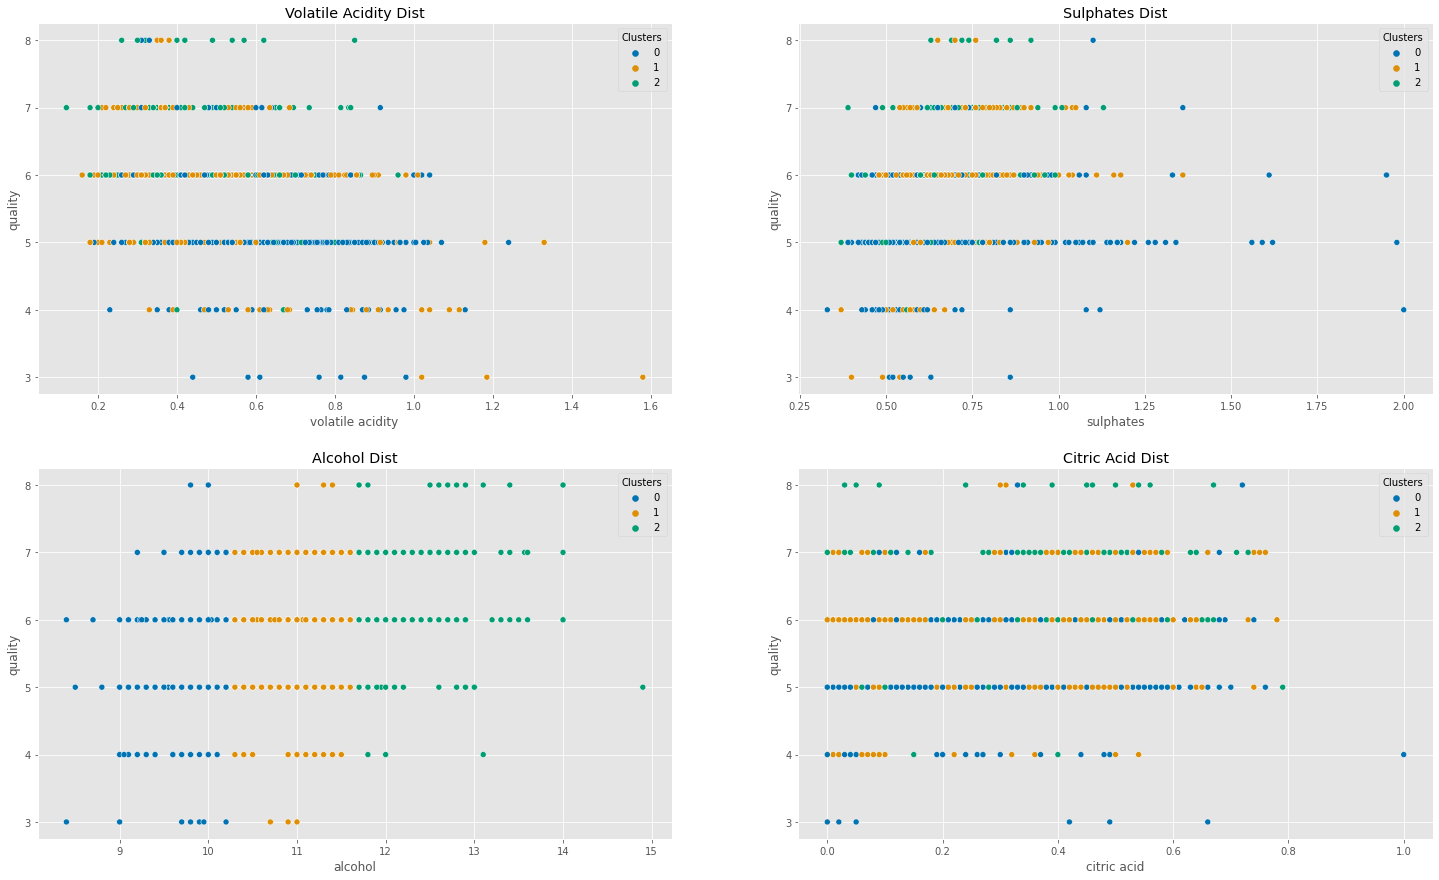

In [23]:
fig, axes = plt.subplots(2,2, figsize=(25,15))

# utilizes the seaborn "hue" to properly label colors.

dfNew = dfShort[['volatile acidity', 'quality']]
dfNew['Clusters'] = labels.tolist()
sns.scatterplot(data = dfNew, x = 'volatile acidity', y = 'quality', hue = 'Clusters', palette = 'colorblind', ax = axes[0][0]).set_title("Volatile Acidity Dist")

df = dfShort[['sulphates', 'quality']]
df['Clusters'] = labels.tolist()
sns.scatterplot(data = df, x = 'sulphates', y = 'quality', hue = 'Clusters', palette = 'colorblind', ax = axes[0][1]).set_title("Sulphates Dist")

df = dfShort[['alcohol', 'quality']]
df['Clusters'] = labels.tolist()
sns.scatterplot(data = df, x = 'alcohol', y = 'quality', hue = 'Clusters', palette = 'colorblind', ax = axes[1][0]).set_title("Alcohol Dist")

df = dfShort[['citric acid', 'quality']]
df['Clusters'] = labels.tolist()
sns.scatterplot(data = df, x = 'citric acid', y = 'quality', hue = 'Clusters', palette = 'colorblind', ax = axes[1][1]).set_title("Citric Acid Dist")
plt.show()